In [1]:
import torch
from torchsummary import summary
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from argparse import ArgumentParser
from torch.utils.data import DataLoader
from tqdm import tqdm
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import RandomSampler
from torchvision import transforms, utils
import torchvision.models as models

import sys
sys.path.insert(1, '../code/')

from dataset import *
from model import *

import librosa
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import librosa.display
import IPython.display as ipd

In [2]:
train_data = Ragam_Dataset(train = True, transform = transforms.Compose([shift_by_random(24)]))
    
val_data = Ragam_Dataset(train = False)

Initializing dataset:
Ragam pickle procesed:  abheri_pickle
Ragam pickle procesed:  shuddhadhanyasi_pickle
5717  chunks.
Finished initializing:  ['abheri_pickle', 'shuddhadhanyasi_pickle']
Initializing dataset:
Ragam pickle procesed:  abheri_pickle
Ragam pickle procesed:  shuddhadhanyasi_pickle
1010  chunks.
Finished initializing:  ['abheri_pickle', 'shuddhadhanyasi_pickle']


tensor(0)


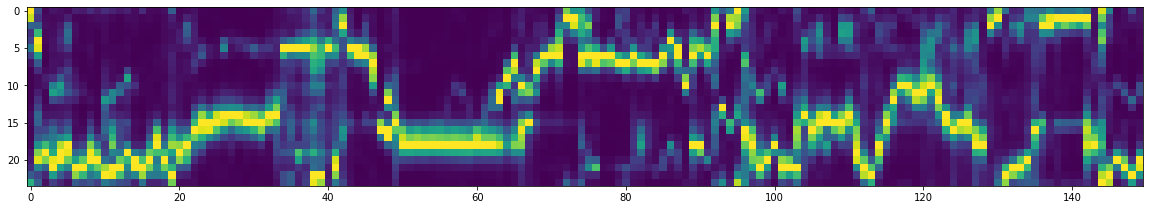

In [3]:
plt.figure(figsize = (20,20))
plt.imshow(val_data[0][0][0])
print(val_data[0][1])

tensor(0)


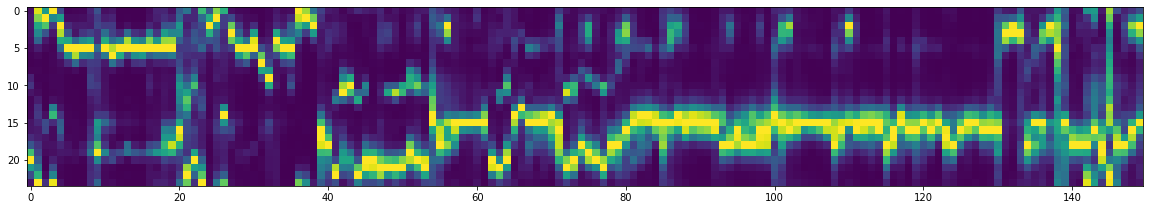

In [4]:
plt.figure(figsize = (20,20))
plt.imshow(val_data[0][0][1])
print(val_data[0][1])

In [5]:
train_data[0][0].size()

torch.Size([10, 24, 150])

# MUSICNN feature extraction



In [6]:
from musicnn.extractor import extractor

In [44]:
file_name = '../data/AbhEri/006a-Abheri-Raga_Alapanai.mp3'
taggram, tags, features = extractor(file_name, model='MTT_musicnn', extract_features=True)

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. 

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


done!


In [45]:
y, sr = librosa.load(file_name)
ipd.Audio(file_name)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [46]:
list(features.keys())

['timbral',
 'temporal',
 'cnn1',
 'cnn2',
 'cnn3',
 'mean_pool',
 'max_pool',
 'penultimate']

In [47]:
len(features['penultimate'])

134

In [56]:
np.array(features['penultimate'][10:-10]).shape

(114, 200)

In [ ]:
#https://github.com/jordipons/musicnn/blob/master/DOCUMENTATION.md